# Problem Statement

The goal of this case study is to develop a predictive model to estimate an employee's salary based on their years of experience. The model should accurately predict the salary, taking into account a linear relationship between the two variables.

**Model Type**: Simple Linear Regression
   - **Simple**: The model examines the relationship between only two variables.
   - **Linear**: The relationship between the variables is linear; as the independent variable (years of experience) increases or decreases, the dependent variable (salary) also increases or decreases in a linear manner.

**Variables**:
   - **Independent Variable (X)**: Number of years of experience.
   - **Dependent Variable (Y)**: Employee salary.

By leveraging a simple linear regression approach, the aim is to quantify how changes in the number of years of experience (X) impact the salary (Y).

## Set-up

In [52]:
# SET MODULE PATH TO ACCESS OTHER PYTHON CODES
from pathlib import Path
import sys
import os

def _set_module_path(dir_level_up: str) -> None:
    """In Jupyter Lab, the __file__ variable is not available as it is not a standalone script, but rather an interactive environment.
    Instead, you can use Path.cwd() to get the current working directory.
    """
    # Create a Path object for the current working directory
    current_dir = Path(globals().get("__vsc_ipynb_file__")) if "__vsc_ipynb_file__" in globals() else Path.cwd() #  #Path(__vsc_ipynb_file__)

    # Create a Path object for the directory level up
    script_dir = current_dir / dir_level_up

    # Get the absolute path of the script_dir
    script_dir_abs = script_dir.resolve()

    sys.path.append(str(script_dir_abs))
    return str(script_dir_abs)


root_path = _set_module_path("../..")
print(f"Project root directory: {root_path}")
print(f"python running from: {sys.executable}")
# print(sys.prefix)
# !which python
!which pip
# !pwd
# envrc_path = f"{root_path}/.envrc"
# print(f"envrc_path: {envrc_path}")
# os.chdir(root_path)

Project root directory: /Users/arifur.rahman/projects/scratchpad/salary-prediction-sagemaker
python running from: /Users/arifur.rahman/projects/scratchpad/salary-prediction-sagemaker/.venv/bin/python
/Users/arifur.rahman/projects/scratchpad/salary-prediction-sagemaker/.venv/bin/pip


In [53]:
from dotenv import load_dotenv, find_dotenv

for f_env in [".env", ".env.override"]:
    load_dotenv(find_dotenv(f_env))
# load_dotenv(dotenv_path="../.env")


print(os.getcwd())
print(os.getenv("ENVIRONMENT"))

/Users/arifur.rahman/projects/scratchpad/salary-prediction-sagemaker
dev


### Logger definition

In [54]:
from salary_prediction_sagemaker.src.logger_utils import logger

logger.info(os.environ.get("ENVIRONMENT"))
logger.error(os.environ.get("ENVIRONMENT"))

[2024-09-12 21:55:07][3897957669.py(3)][<module>()]INFO: dev
[2024-09-12 21:55:07][3897957669.py(4)][<module>()]ERROR: dev


## Import libraries and datasets

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df_salary = pd.read_csv("./data/raw/salary.csv")
display(df_salary.head(3))  # tail(3)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731


# Exploratory Data Analysis

Is any value null: False


<Axes: >

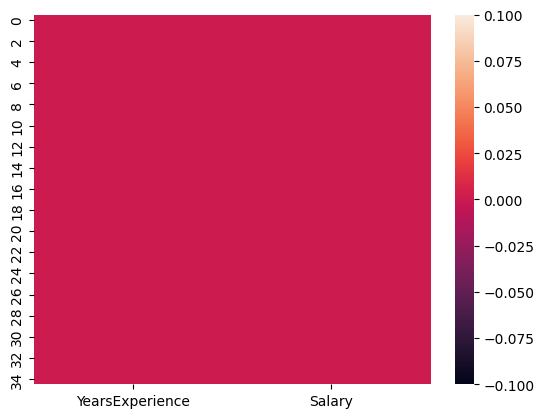

In [57]:
# Check for Null values
print(f"Is any value null: {df_salary.isnull().any().any()}")
sns.heatmap(df_salary.isnull())

In [65]:
df_salary.info()
# All 35 entries are complete with no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [66]:
df_salary.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


### Distribution of `Years of Experience`

**Mean:** The average number of years of experience is approximately 6.31 years, with a standard deviation of around 3.62 years. This indicates a moderate spread around the mean.  
**Range:** Experience ranges from 1.1 years to 13.5 years, suggesting a diverse range of experience levels among employees.  
**Percentiles:**
- 25th percentile (Q1) at 3.45 years suggests that 25% of employees have 3.45 years or less of experience.
- Median (50th percentile) is 5.3 years, showing that half of the employees have 5.3 years or less experience.
- 75th percentile (Q3) at 9.25 years indicates that 75% of employees have 9.25 years or less of experience.

### Distribution of `Salary`

**Mean:** The average salary is approximately $83,946, with a standard deviation of about $32,163. This high standard deviation relative to the mean suggests significant variability in salaries.
**Range:** Salaries vary from $37,731 to $139,465. This broad range indicates substantial differences in compensation within the dataset.
**Percentiles:**
- 25th percentile at $57,019 indicates that 25% of employees earn this amount or less.
- Median (50th percentile) is $81,363, showing that half of the employees earn this amount or less.
- 75th percentile at $113,224 suggests that 75% of employees earn up to this amount.

### Potential Outliers:  
Both the maximum ($1,39,465) and minimum ($37,731) values for salary are considerably different from the median ($81,363) and mean ($83,945). This suggests the presence of outliers which could significantly impact the mean and standard deviation. Identifying and understanding these outliers would be critical for a more accurate analysis.

**Steps to Identify Outliers:**  
- Visual Inspection: Examine scatter plots or pair plots for any data points that lie far from the fitted line.
Statistical Analysis:
- Perform a regression analysis and check residuals for any large deviations from the predicted values.
Z-Score Calculation:
- Compute Z-scores for Salary and Years of Experience. Data points with Z-scores greater than 3 or less than -3 can be considered outliers.

In [60]:
print("Data for max & min Salary:")
display(df_salary[df_salary["Salary"] == df_salary["Salary"].max()])
display(df_salary[df_salary["Salary"] == df_salary["Salary"].min()])
print("Data for max & min YearsExperience:")
display(df_salary[df_salary["YearsExperience"] == df_salary["YearsExperience"].max()])
display(df_salary[df_salary["YearsExperience"] == df_salary["YearsExperience"].min()])

Data for max & min Salary:


,YearsExperience,Salary
34,13.5,139465


,YearsExperience,Salary
2,1.5,37731


Data for max & min YearsExperience:


,YearsExperience,Salary
34,13.5,139465


,YearsExperience,Salary
0,1.1,39343


### Next Steps:
**Visual Analysis:**
Plotting histograms, scatter plots, and box plots can provide further insights into the distribution and relationships within the data. 

**Correlation Analysis:**
Given the dataset's nature, it's important to examine the relationship between years of experience and salary. Typically, we might expect a positive correlation, where more experience leads to higher salaries. This can be visualized using scatter plots and further analyzed with correlation coefficients.  

**Outlier Detection:**  
Investigate outliers in both years of experience and salary to determine their impact and whether they should be included or excluded in further analysis.

In [61]:
# Calculate histogram data
hist, bins = pd.cut(df_salary["Salary"], bins=30, retbins=True, include_lowest=True)
hist_table = pd.value_counts(hist)  # .sort_index()
display(hist_table)

/var/folders/pt/hc4ffzjs7pn4g33c7mgjtyc40000gq/T/ipykernel_35765/1569938813.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  hist_table = pd.value_counts(hist)  # .sort_index()


YearsExperience
(1.0870000000000002, 1.513]    3
(3.993, 4.407]                 3
(1.927, 2.34]                  2
(2.753, 3.167]                 2
(3.167, 3.58]                  2
(3.58, 3.993]                  2
(9.367, 9.78]                  2
(4.82, 5.233]                  2
(10.193, 10.607]               2
(5.647, 6.06]                  2
(11.02, 11.433]                1
(8.953, 9.367]                 1
(12.26, 12.673]                1
(11.433, 11.847]               1
(8.127, 8.54]                  1
(12.673, 13.087]               1
(8.54, 8.953]                  1
(13.087, 13.5]                 1
(7.713, 8.127]                 1
(6.887, 7.3]                   1
(6.473, 6.887]                 1
(5.233, 5.647]                 1
(4.407, 4.82]                  1
(1.513, 1.927]                 0
(9.78, 10.193]                 0
(10.607, 11.02]                0
(6.06, 6.473]                  0
(11.847, 12.26]                0
(2.34, 2.753]                  0
(7.3, 7.713]               

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

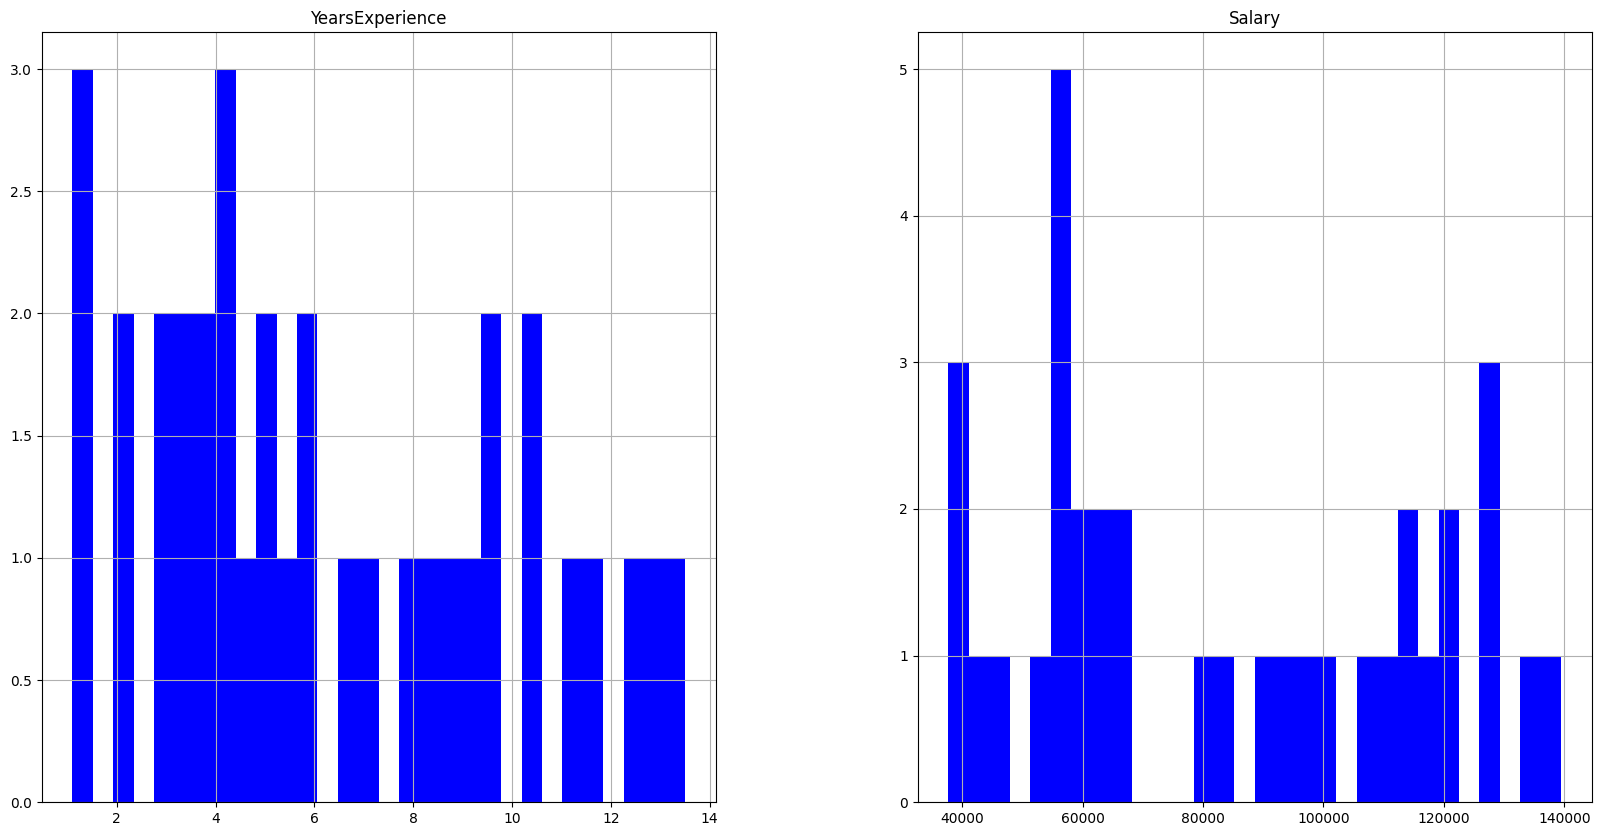

In [62]:
# Histogram
df_salary.hist(bins=30, figsize=(20, 10), color="b")

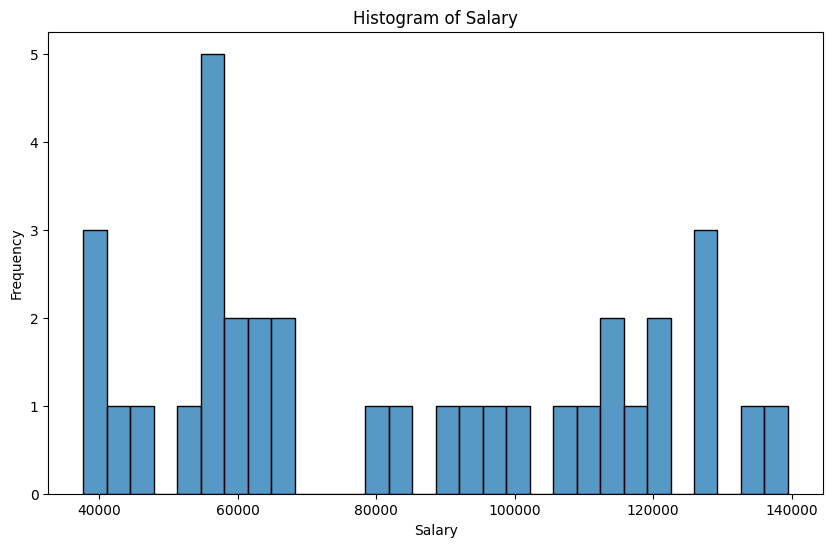

In [69]:
# Create and show histogram plot of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df_salary["Salary"], bins=30, kde=False)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

The salary data shows two distinct clusters: one in the lower salary ranges and one in the higher salary ranges. This suggests a bimodal distribution, possibly reflecting different roles or levels within the organization or industry.

**Experience and Salary Clusters:**
   - The salary data clusters around certain ranges, and these clusters align with specific years of experience. For instance, salaries in the range (125900.467, 129291.6] correspond to higher experience brackets, such as [9.367, 9.78] and [10.193, 10.607], indicating that more experienced individuals tend to have higher salaries. Conversely, lower salary ranges, such as [37629.26500000001, 41122.133], match with lower experience intervals like [1.087, 1.513], suggesting that entry-level positions typically offer lower salaries.

**Gap Analysis and Salary Distribution:**
   - Notable gaps in the years of experience data, such as between [2.34, 2.753] and [3.167, 3.58], correlate with zero frequencies in specific salary ranges (e.g., [85206.867, 88598.0]). This indicates that there may be less common experience levels or salary bands that are not well represented. Addressing these gaps could provide a more comprehensive understanding of salary distribution across different experience levels.

**High Experience with Consistent Salaries:**
   - Certain experience ranges, such as [4.82, 5.233] and [5.647, 6.06], have consistent salaries in specific ranges, like [54686.667, 58077.8] and [58077.8, 61468.933]. This suggests that as experience increases, salaries tend to fall within certain stable ranges, reflecting a pattern where more experience often leads to higher but relatively stable salary bands. This could indicate that salary progression with experience is more predictable within certain bands.



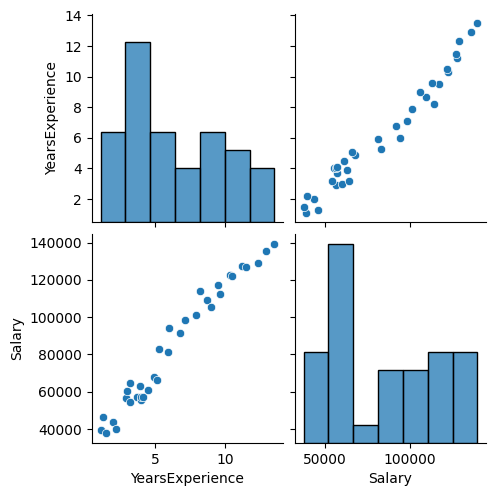

In [63]:
# plot pairplot
sns.pairplot(df_salary)

It can be observed in the above plot that a straight line can be fit to represent the relationship between Salary and Years of Experience which indicates a strong linear correlation between these two variables. This implies that as years of experience increase, there is a corresponding, predictable increase in salary.

While a straight line fit suggests a strong linear relationship, it's important to validate this finding with additional statistical analysis, such as calculating the correlation coefficient and performing regression analysis. This will confirm the strength of the linear relationship and ensure that the model appropriately fits the data. Additionally, investigating potential outliers or deviations from the linear trend can provide deeper insights into any anomalies or variations within the data.

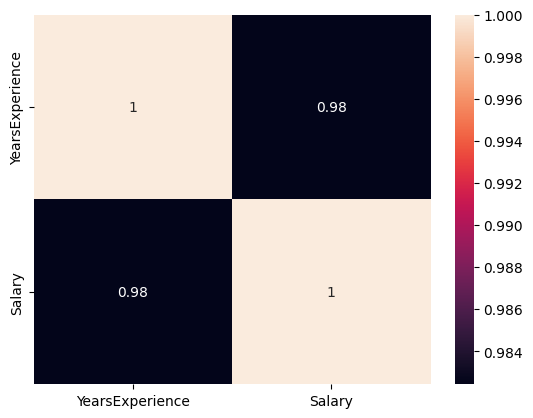

In [64]:
# **Correlation Matrix:**
# Heatmap for correlation matrix
corr_matrix = df_salary.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The correlation matrix reveals a very high positive correlation of 0.982 between Years of Experience and Salary.  

This indicates a strong and nearly perfect linear relationship: as Years of Experience increases, Salary tends to increase proportionally.  
This suggests that experience is a significant predictor of salary in this dataset, supporting the observed linear trend between these variables.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

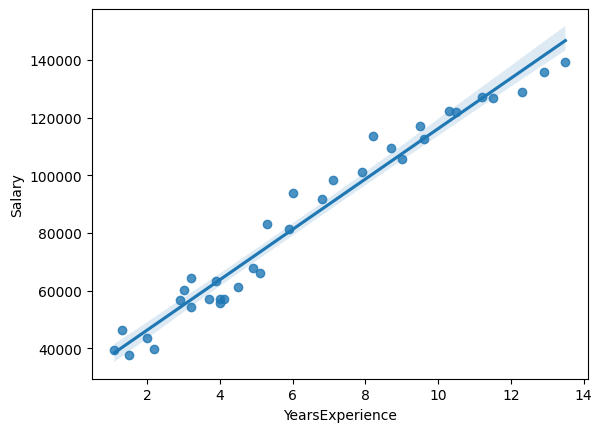

In [67]:
# regression plot
sns.regplot(x="YearsExperience", y="Salary", data=df_salary)

Given the very high correlation of 0.982 between Years of Experience and Salary, and the observation that a straight line fits the data well in the regression line of `order=1`, it is unlikely that there are significant outliers. The strong linear relationship suggests that no data points deviate substantially from the trend.

# Training & Test Dataset

In [99]:
from sklearn.model_selection import train_test_split

# Independent variable, X
X = df_salary[["YearsExperience"]]  # X is DataFrame, whereas df_salary['Salary'] is a Series
# Dependent variable, y
y = df_salary[["Salary"]]
# print(f"X:\n{X}\n\ny:\n{y}")
X = np.array(X).astype("float32")  # Linear Learner in sagemaker requires float32
y = np.array(y).astype("float32")
print(X.shape, ": ", type(X))
print(y.shape)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"{X_train_np.shape} : {type(X_train_np)}\n{X_test_np.shape}\n{y_train_np.shape}\n{y_test_np.shape}")

(35, 1) :  <class 'numpy.ndarray'>
(35, 1)
(28, 1) : <class 'numpy.ndarray'>
(7, 1)
(28, 1)
(7, 1)


In [98]:
target_attribute = df_salary["Salary"]  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(
    df_salary.drop("Salary", axis=1), target_attribute, test_size=0.2, random_state=42
)  # df_salary['Salary'] is dropped as YearsExperience is independent variable here
print(f"{X_train.shape}: {type(X_train)}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(28, 1): <class 'pandas.core.frame.DataFrame'>
(7, 1)
(28,)
(7,)


```
np.array(df_salary['Salary']).shape # (35,)
np.array(df_salary[['Salary']]).shape # (35, 1)
np.array(X_train).shape # (28, 1)
```

In [101]:
# Analyse the order of the train & test data
display(df_salary)
display(X_train)
display(X_test)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


,YearsExperience
12,4.0
8,3.2
16,5.1
9,3.7
33,12.9
0,1.1
4,2.2
17,5.3
27,9.6
5,2.9


,YearsExperience
26,9.5
13,4.1
24,8.7
21,7.1
15,4.9
29,10.5
19,6.0


The `train_test_split()` method not only divides the dataset into training and testing subsets but also shuffles the data by default. Shuffling is crucial because it prevents the model from learning any patterns based on the order of the data, which could lead to biased or inaccurate evaluations of its performance. By randomizing the data, we ensure that the training and testing sets are representative and that the model's performance is evaluated more reliably.

## Linear Regression model using scikit-learn

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [103]:
lin_regress_sklearn = LinearRegression(fit_intercept=True)
# fit_intercept=True means in `y=mX+b`, b can be non-zero, whereas False forces b=0 i.e. fitted line goes throug origin
lin_regress_sklearn.fit(X_train, y_train)

LinearRegression()

In [107]:
lin_regress_sklearn_accuracy = lin_regress_sklearn.score(X_test, y_test)
print(f"Linear regression model accuracy: {lin_regress_sklearn_accuracy}")
print(f"Linear regression model coefficient (m): {lin_regress_sklearn.coef_}")
print(f"Linear regression model y-intercept (b): {lin_regress_sklearn.intercept_}")

Linear regression model accuracy: 0.891423414004278
Linear regression model coefficient (m): [8578.76747669]
Linear regression model y-intercept (b): 29078.626034406858


## Performance Evaluation

In [108]:
y_predict = lin_regress_sklearn.predict(X_test)

In [112]:
print("Predicted vs Actual Values:")
for predicted, actual in zip(y_predict, y_test):
    print(f"{predicted} vs {actual}")

Predicted vs Actual Values:
110576.91706292318 vs 116969
64251.572688819164 vs 57081
103713.90308157443 vs 109431
89987.87511887695 vs 98273
71114.58667016792 vs 67938
119155.68453960911 vs 121872
80551.23089452244 vs 93940


Text(0.5, 1.0, 'Relation between Salary and Years of Experience')

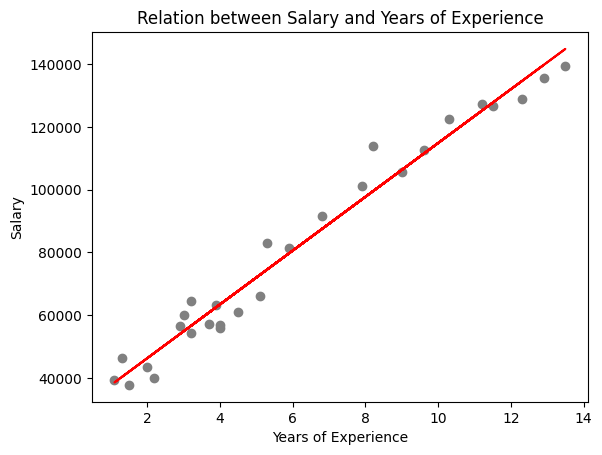

In [115]:
plt.scatter(X_train, y_train, c="gray")  # Scatter plot
plt.plot(X_train, lin_regress_sklearn.predict(X_train), c="red")  # Linear plot
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Relation between Salary and Years of Experience")
# plt.show()

## How to use the model
What is the salary of an employee who has experience of 6 and 2 years?

In [119]:
experience_yrs = pd.DataFrame.from_dict(data={"YearsExperience": [6, 2]})
display(experience_yrs)

,YearsExperience
0,6
1,2


In [123]:
salary_yrs = lin_regress_sklearn.predict(experience_yrs)
print(f"salary of 6 and 2 years: {salary_yrs}\ntype: {type(salary_yrs)}")

salary of 6 and 2 years: [80551.23089452 46236.16098778]
type: <class 'numpy.ndarray'>
